# Text Encryption using Play Fair Algorithm

### Generating an Encryption key

In [25]:
a=input("Enter key you want to use for encryption. It can be any combination of English alphabets or mathematical numerical value (max-length should be 36 chars): ")
b="abcdefghijklmnopqrstuvwxyz0123456789"
c=[]
for i in range(len(a)):
    if a[i] not in c:
        c.append(a[i])
for j in range(len(b)):
    if b[j] not in a:
        c.append(b[j])
d=[]
for i in range(0,35,6):
    d.append(c[i:i+6])
print(d)

Enter key you want to use for encryption. It can be any combination of English alphabets or mathematical numerical value (max-length should be 36 chars): bhuvan
[['b', 'h', 'u', 'v', 'a', 'n'], ['c', 'd', 'e', 'f', 'g', 'i'], ['j', 'k', 'l', 'm', 'o', 'p'], ['q', 'r', 's', 't', 'w', 'x'], ['y', 'z', '0', '1', '2', '3'], ['4', '5', '6', '7', '8', '9']]


### Encrypting a text using the above provided key

In [26]:
def search(char,d):
    for i in range(0,6):
        for j in range(0,6):
            if d[i][j]==char:
                return i,j

n=input("Enter the text (in lowercase) you want to encrypt: ")
l=0
m=0
p=""
while(m<len(n)):
    if m==len(n)-1:
        p+=n[m]
    else:
        q,r,s,t=search(n[m],d)[0],search(n[m],d)[1],search(n[m+1],d)[0],search(n[m+1],d)[1]
        if n[m]==n[m+1]:
            p=p+n[m]+"@"

        elif q==s:
            p=p+d[q][(r+1)%6]+d[s][(t+1)%6]

        elif r==t:
            p=p+d[(q+1)%6][r]+d[(s+1)%6][t]

        else:
            p=p+d[q][t]+d[s][r]
    m=m+2
        
print("Encrypted message: "+ p)

Enter the text (in lowercase) you want to encrypt: hello
Encrypted message: udl@o


### Decrypting the encrypted message using the key provided

In [27]:
n=p
m=0
p=""
while(m<len(n)):
    if m==len(n)-1:
        p+=n[m]
    elif n[m]=="@" or n[m+1]=="@":
        if n[m]!="@":
            p+=n[m]+n[m]
            
        else:
            p+=n[m+1]+n[m+1]
            
    else:
        q,r,s,t=search(n[m],d)[0],search(n[m],d)[1],search(n[m+1],d)[0],search(n[m+1],d)[1]
    
        if q==s:
            p=p+d[q][(r-1)%6]+d[s][(t-1)%6]
            
        elif r==t:
            p=p+d[(q-1)%6][r]+d[(s-1)%6][t]
            
        else:
            p=p+d[q][t]+d[s][r]
    m=m+2
        
print("Decrypted message: "+p)

Decrypted message: hello


# Image Encryption

### Image Input

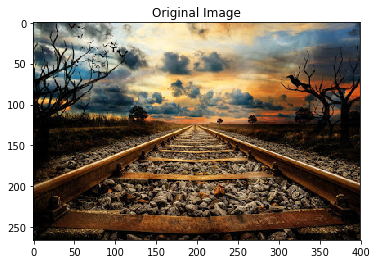

In [34]:
import matplotlib.pyplot as plt,numpy as np,random
from numpy import zeros
#Enter the address of the image inside r""
#Enter a jpg image.
img=plt.imread(r"C://Users/sadan/download_1.jpg")

rows=img.shape[0]
col=img.shape[1]

plt.title("Original Image")
plt.imshow(img)
plt.show()

### Generating Key

In [35]:
#Here I had generated a key with the help og random values. You can skip this step and provide your own key below.
key=[]
while len(key)!=256:
    j=random.randrange(0,256)
    if j not in key:
        key.append(j)

### Encrypt Image

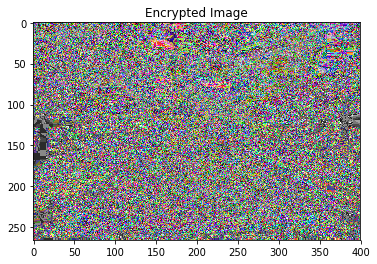

In [40]:
#You can enter your own key in form of a list of randomly arranged numbers from 0 to 255.
#key=[]

def encrypt_image(img, key, rows, col):
    img1=np.zeros((rows,col,3),dtype=int)
    for i in range(rows):
        for j in range(col):
            for k in range(3):
                img1[i][j][k]=key[img[i][j][k]]
    return img1

img1=encrypt_image(img,key,rows,col)
plt.title("Encrypted Image")
plt.imshow(img1)
plt.show()

### Decrypt above encrypted image

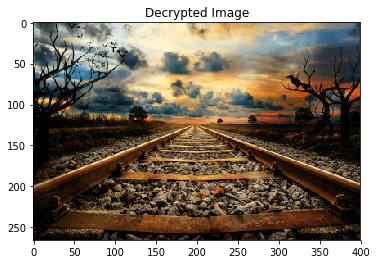

In [41]:
def decrypt_image(img,key, rows, col):
    img1=np.zeros((rows,col,3),dtype=int)
    for i in range(rows):
        for j in range(col):
            for k in range(3):
                img1[i][j][k]=key.index(img[i][j][k])
    return img1

img3=decrypt_image(img1,key,rows,col)
plt.title("Decrypted Image")
plt.imshow(img3)
plt.show()